# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module I:** Time Series and Forecast
#### Topic: White Noise & Random Walk


##### Name: Julio César Avila Torreblanca

- **Objective**: simulate and analyse a *White Noise* and a *Random Walk* process.

- **Contents**:
    1. Libraries and parameters
    2. White Noise
        - Data Generation
        - Analysis
    3. Random Walk
        - Data Generation
        - Analysis
    4. Conclusions
---

# Class Notes: Time Series Analysis - White Noise and Random Walk

## Definition of a Time Series

A time series is a sequence of data points indexed in time order. These data points are typically measured at successive points in time, often at uniform intervals. Time series analysis involves understanding the underlying structure and function of the data points.

### Components of a Time Series

A time series can generally be decomposed into several key components:

1. **Trend ($T_t$)**: This is the long-term progression of the series or the direction in which the data is moving over a long period. It represents the underlying direction and movement of the data.

2. **Seasonal ($S_t$)**: This component captures the repeating short-term cycle in the series, such as daily, monthly, or annually fluctuations. It represents known periodic fluctuations.

3. **Cyclical ($C_t$))**: Unlike the seasonal component, cyclical effects are not of a fixed period and are often associated with economic cycles. They last longer than a year and vary in duration and amplitude.

4. **Residual/Irregular ($e_t$)**: This component captures the random variation or noise that cannot be attributed to trend, seasonal, or cyclical components.

### Mathematical Representation

A general time series can be expressed as:

- **Additive Model**:

$$
Y_t = T_t + S_t + C_t + e_t
$$

This model is commonly used when the magnitude of the fluctuations does not change over time or does not depend on the level of the time series.

- **Multiplicative Model**:

$$
Y_t = T_t \times S_t \times C_t \times e_t
$$

This model is appropriate when the magnitude of the fluctuations increases over time, making the variance proportional to the level of the series.
## White Noise

### Definition

White noise is a fundamental concept in time series analysis representing a series of uncorrelated random variables, each with **zero mean** and **constant variance**. It serves as a basic building block for more complex time series models.

### Characteristics

- **Mean**: $\mu = 0$
- **Variance**: $\sigma^2$ is constant over time.
- **Autocovariance**: $\gamma(h) = 0$ for all non-zero lags $h$.
- **Autocorrelation**: $\rho(h) = 0$ for all non-zero lags $h$.

When plotted, a white noise series should appear as a random scatter of points without discernible patterns.

## Random Walk

### Definition

A random walk is a type of non-stationary time series. It is characterized by each value in the series being the sum of the previous value plus a stochastic error term (usually modeled as white noise).

### Mathematical Formulation

The random walk process can be described by the equation:

$$
r_t = r_{t-1} + w_t
$$

where:
- $r_t$ is the value of the series at time $t$,
- $r_{t-1}$ is the value at time $t-1$,
- $w_t$ is a white noise error term.

### Characteristics

- **Non-stationary**: The mean and variance of a random walk change over time.
- **Variance grows with time**: $ \text{Var}(r_t) = t\sigma^2$ if $w_t \sim \text{WN}(0, \sigma^2) $.
- A random walk is a series whose first difference is stationary and uncorrelated.

A random walk often models stock prices and other financial metrics because it captures the unpredictability inherent in markets.

### Stationarity Note

While white noise is stationary, a random walk is not. This distinction is crucial in modeling and forecasting time series data.

---

# 1. Librerías y parámetros

In [25]:
import numpy as np
import pandas as pd

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

# 2. White Noise Analysis

## 2.1 WN from a Normal Distribution
**$WN≈N(0,1)$**

### Data Generation

In [5]:
mean = 0
std = 1
n_samples = 365
white_noise = pd.Series(np.random.normal(mean, std, n_samples))

### Analysis

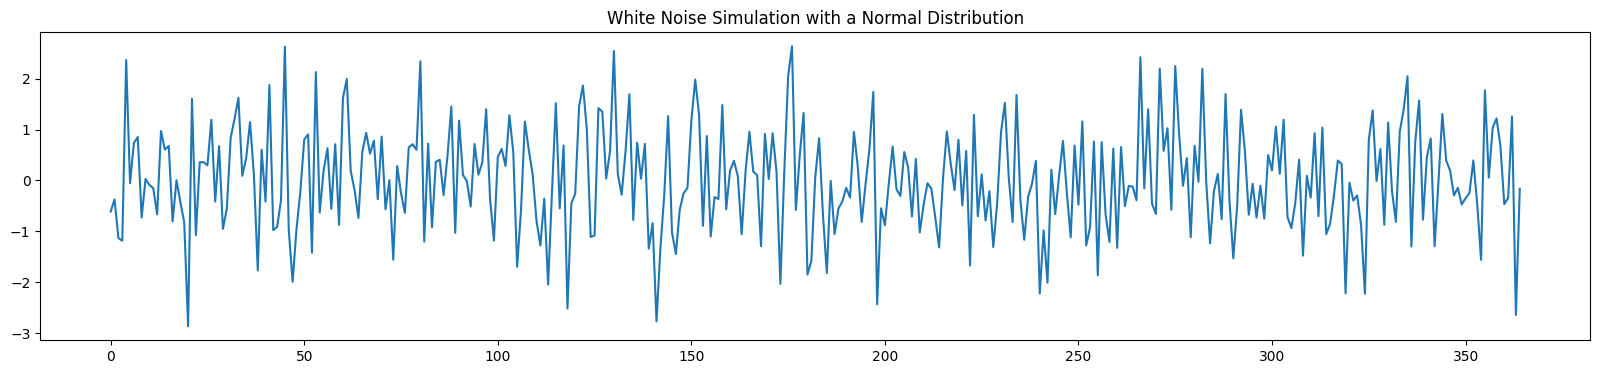

In [10]:
white_noise.plot(figsize = (20,4))
plt.title("White Noise Simulation with a Normal Distribution")
plt.show()

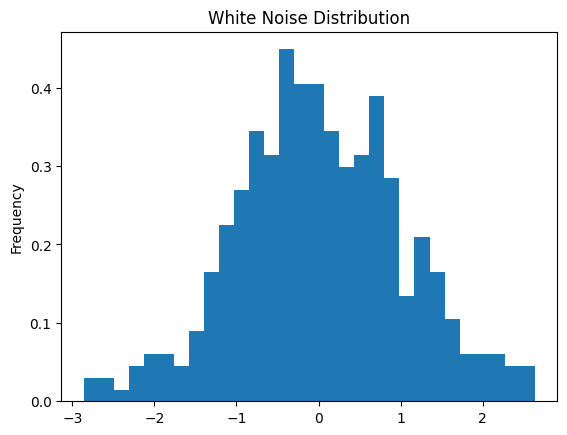

In [7]:
white_noise.plot.hist(bins=30, density=True)
plt.title("White Noise Distribution")
plt.show()

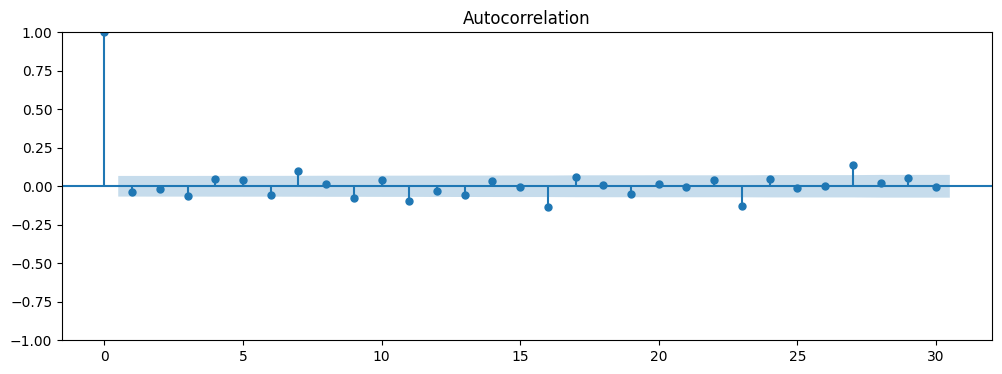

In [23]:
fig, ax = plt.subplots(figsize=(12,4))

plot_acf(white_noise,
         alpha=0.2,
         lags=30,
         ax=ax
         )
plt.show()

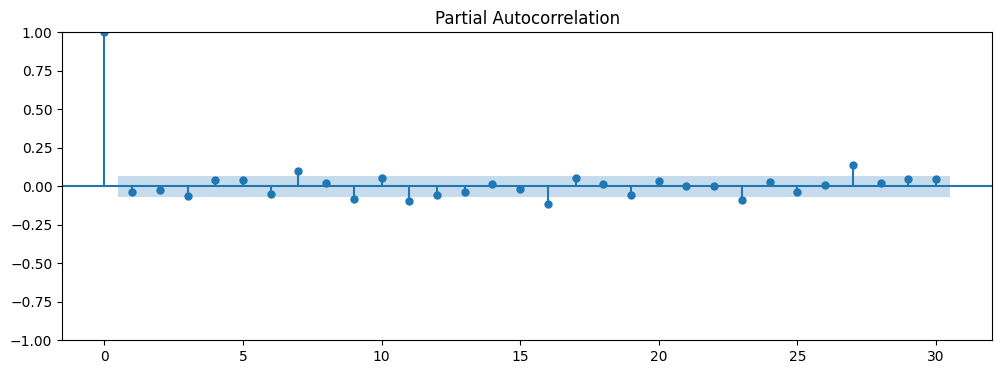

In [24]:
fig, ax = plt.subplots(figsize=(12,4))

plot_pacf(white_noise,
         alpha=0.2,
         lags=30,
         ax=ax
         )
plt.show()

## 2.2 WN from a Bernoulli distribution
$ WN ≈ Ber(p)$

Let $X_t$ a process independent and $Y$ a random variable with a Bernoulli distribution and $p=0.05$. Then, the random variable:
$$ Z_t = X_tY - X_t (Y-1)^2$$
is white noise.

### Data Generation

In [13]:
n_samples = 1000
X_t = pd.Series(np.random.normal(size= n_samples))
Y = pd.Series(np.random.binomial(1, p = 0.05, size = n_samples))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

### Analysis

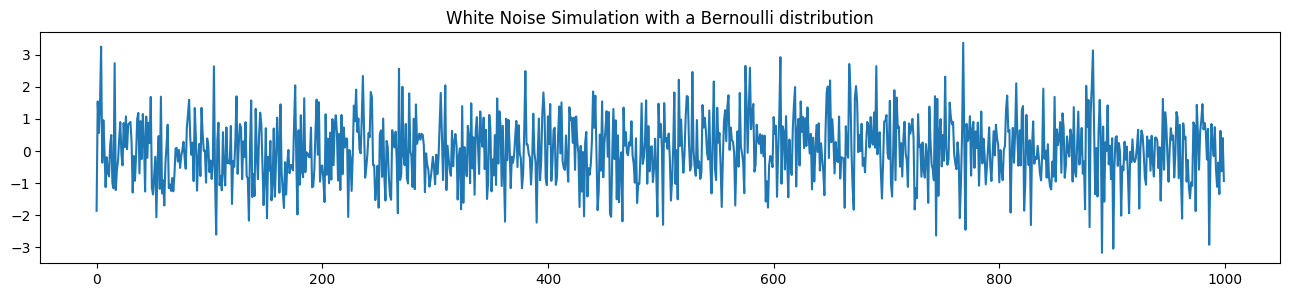

In [14]:
Z_t.plot(figsize = (16,3))
plt.title("White Noise Simulation with a Bernoulli distribution")
plt.show()

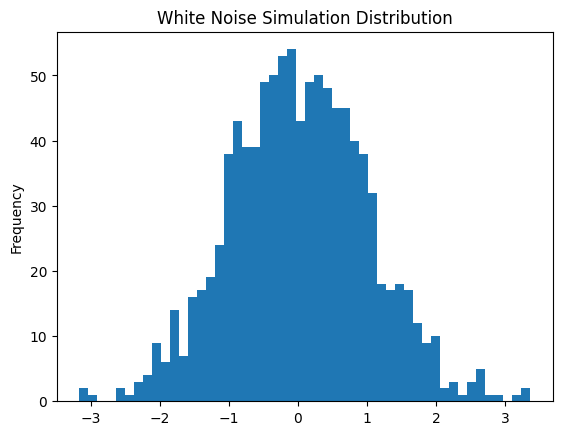

In [15]:
Z_t.plot.hist(bins=50)
plt.title("White Noise Simulation Distribution")
plt.show()

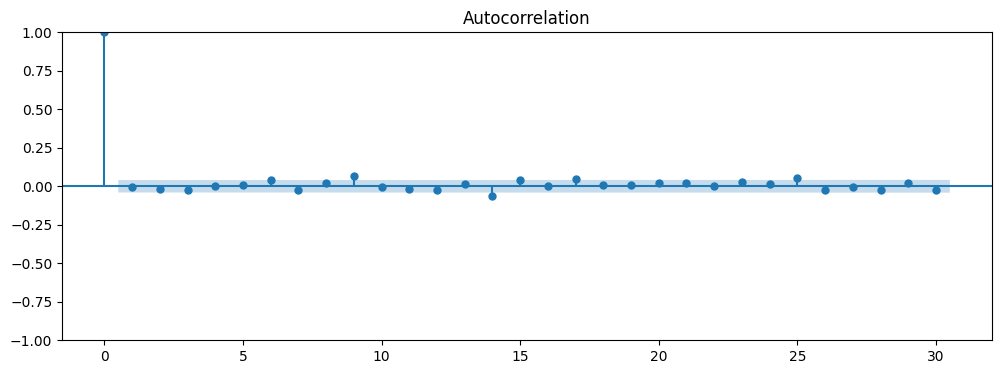

In [21]:
fig, ax = plt.subplots(figsize=(12,4))

plot_acf(Z_t,
         alpha=0.2,
         lags=30,
         ax=ax
         )
plt.show()

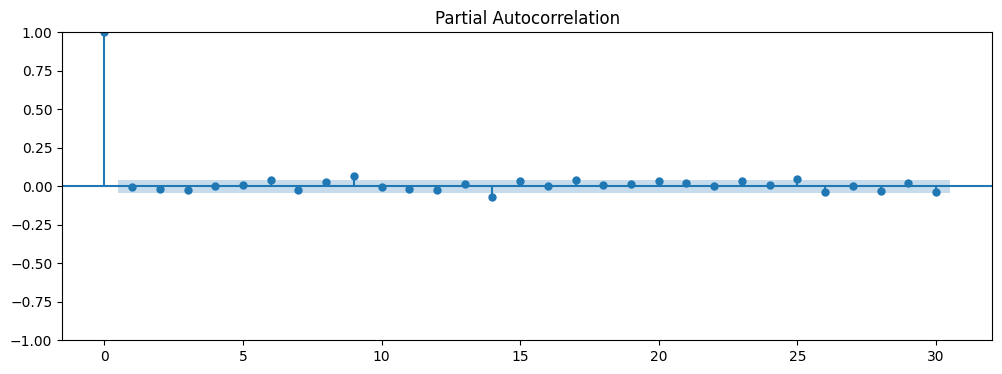

In [22]:
fig, ax = plt.subplots(figsize=(12,4))

plot_pacf(Z_t,
         alpha=0.2,
         lags=30,
         ax=ax
         )
plt.show()

# 3. Random Walk Analysis

## 3.1 Data Generation

In [26]:
# setting a seed
np.random.seed(42)

# number of steps
steps = np.random.standard_normal(1000)
steps[0] = 0 # setting first step in zero

random_walk = np.cumsum(steps) # creating time series taking into account previous step

## 3.2 Analysis Rdm Walk

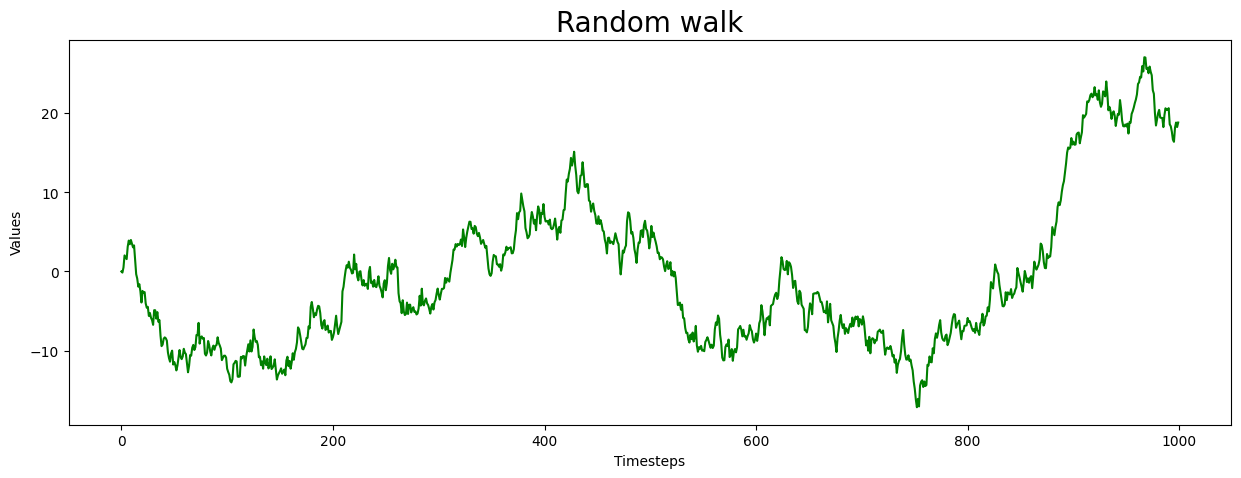

In [39]:
# plotting time series
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(random_walk, color='g')
ax.set(xlabel='Timesteps', ylabel='Values', title = 'Random walk')
ax.title.set_size(20)

plt.show()

### Test Stationary
In order to test stationary, we'll use Augmented Dickey-Fuller (ADF) test. This test evaluates the nule hypothesis of the presence of unit root in the time series. If there nule hypothesis is true, the time series is not stationary, so it is necessary to applied transformations. Let's apply the test to get the p-values.

In [29]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


Besides, we're going to apply the Autocorrelation Function (ACF) to get the autocorrelation coefficients and observe their behavior.

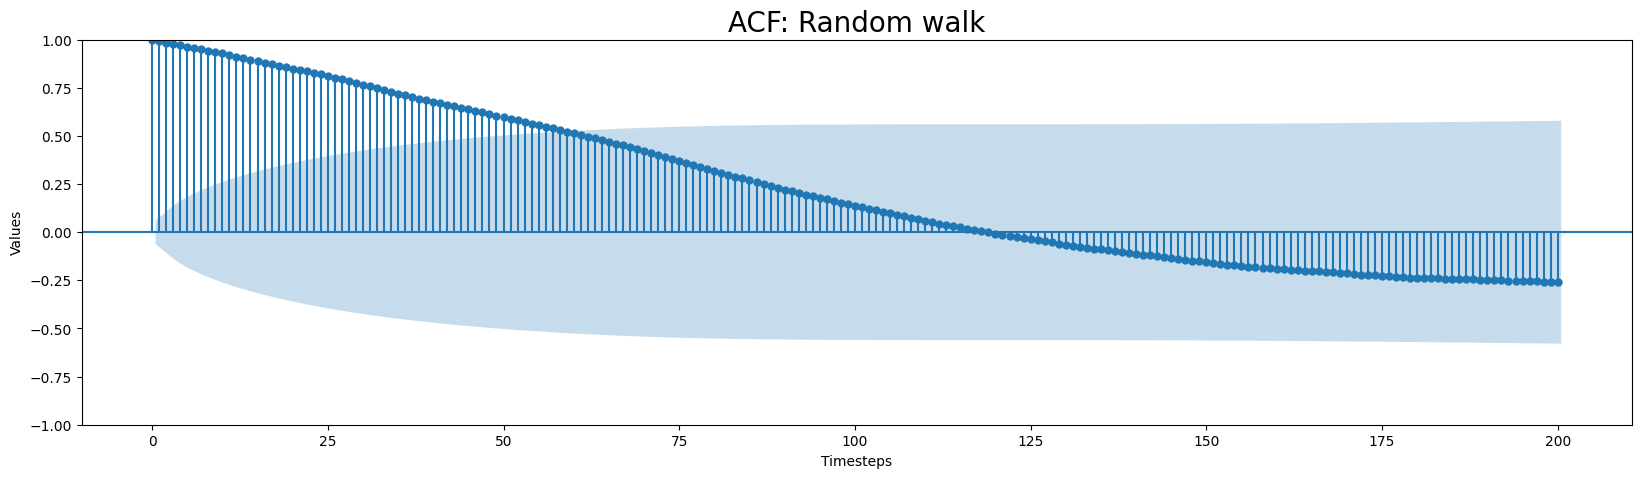

In [35]:
n_coef = 200
fig, ax = plt.subplots(figsize=(20,5))

# applying ACF
plot_acf(random_walk, ax=ax, lags=n_coef)
ax.set(xlabel='Timesteps', ylabel='Values', title = 'ACF: Random walk')
ax.title.set_size(20)
plt.show()

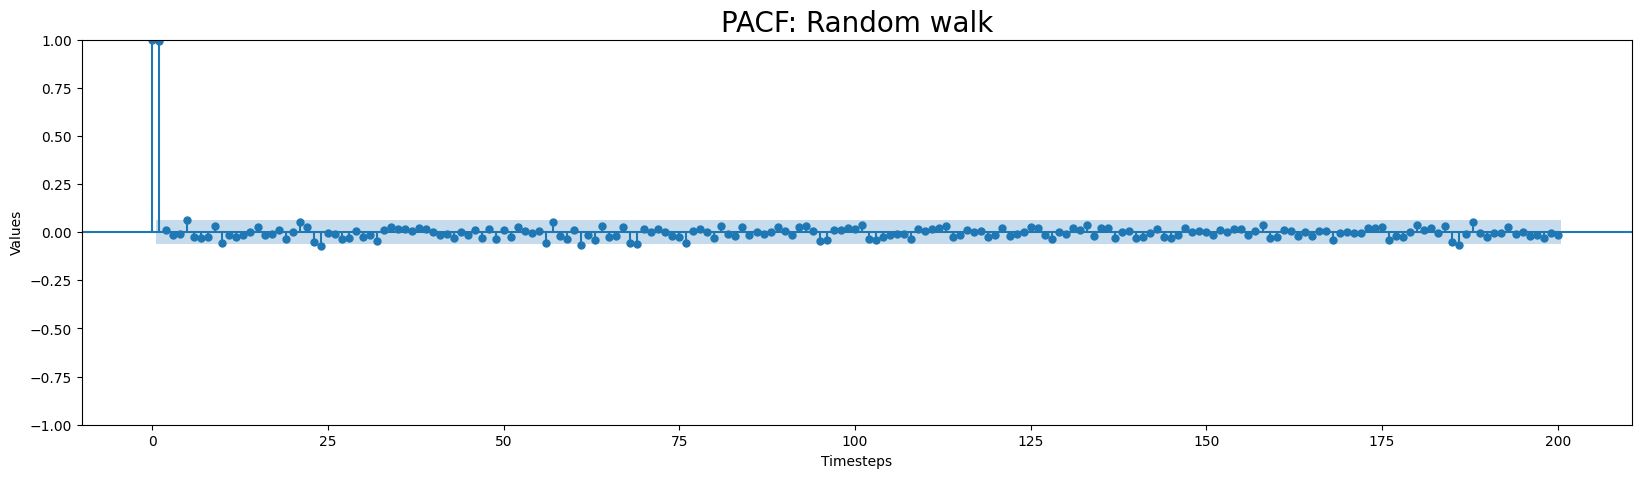

In [36]:
n_coef = 200
fig, ax = plt.subplots(figsize=(20,5))

# applying ACF
plot_pacf(random_walk, ax=ax, lags=n_coef)
ax.set(xlabel='Timesteps', ylabel='Values', title = 'PACF: Random walk')
ax.title.set_size(20)
plt.show()

## 3.3 Analysis Fisrt difference order Rdm Walk

In [37]:
# getting differences
n_differences = 1 # number of differences (order)
diff_random_walk = np.diff(random_walk, n=n_differences)

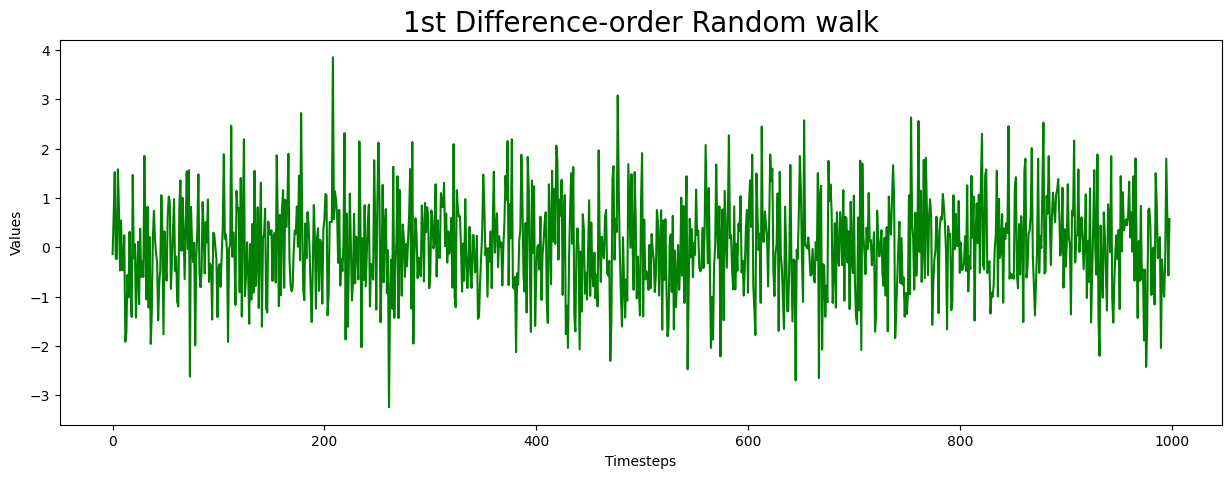

In [40]:
# plotting time series
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(diff_random_walk, color='g')
ax.set(xlabel='Timesteps', ylabel='Values', title = '1st Difference-order Random walk')
ax.title.set_size(20)

plt.show()

### Test Stationary

In [41]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


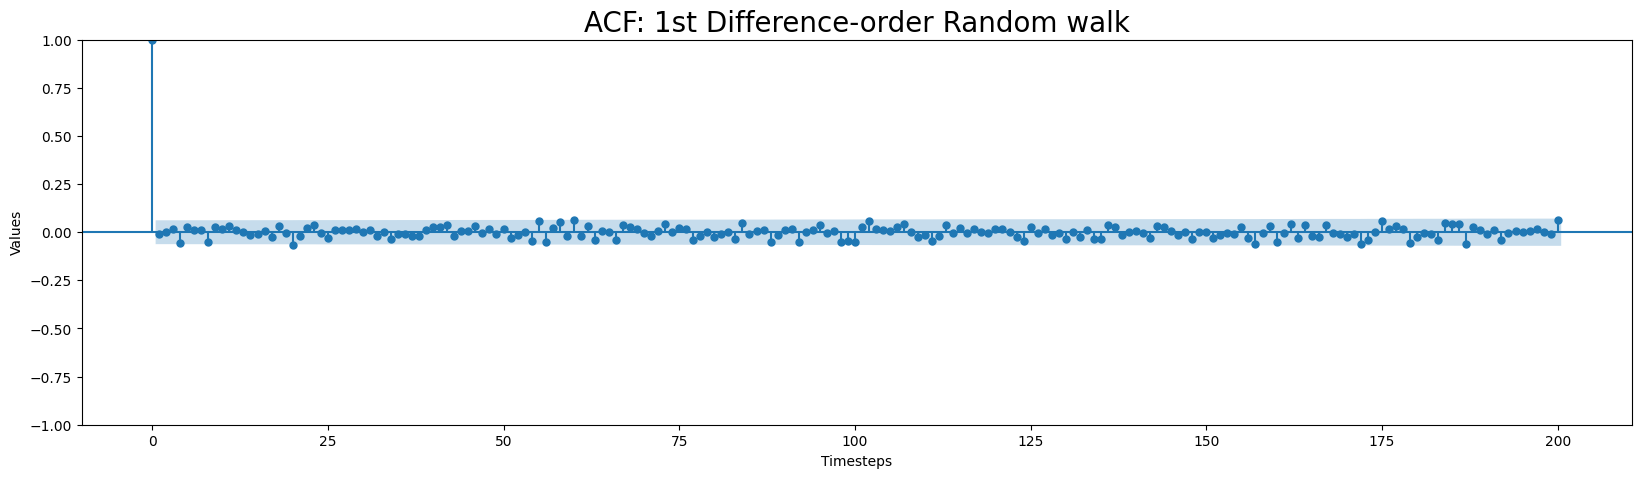

In [43]:
n_coef = 200
fig, ax = plt.subplots(figsize=(20,5))

# applying ACF
plot_acf(diff_random_walk, ax=ax, lags=n_coef)
ax.set(xlabel='Timesteps', ylabel='Values', title = 'ACF: 1st Difference-order Random walk')
ax.title.set_size(20)
plt.show()

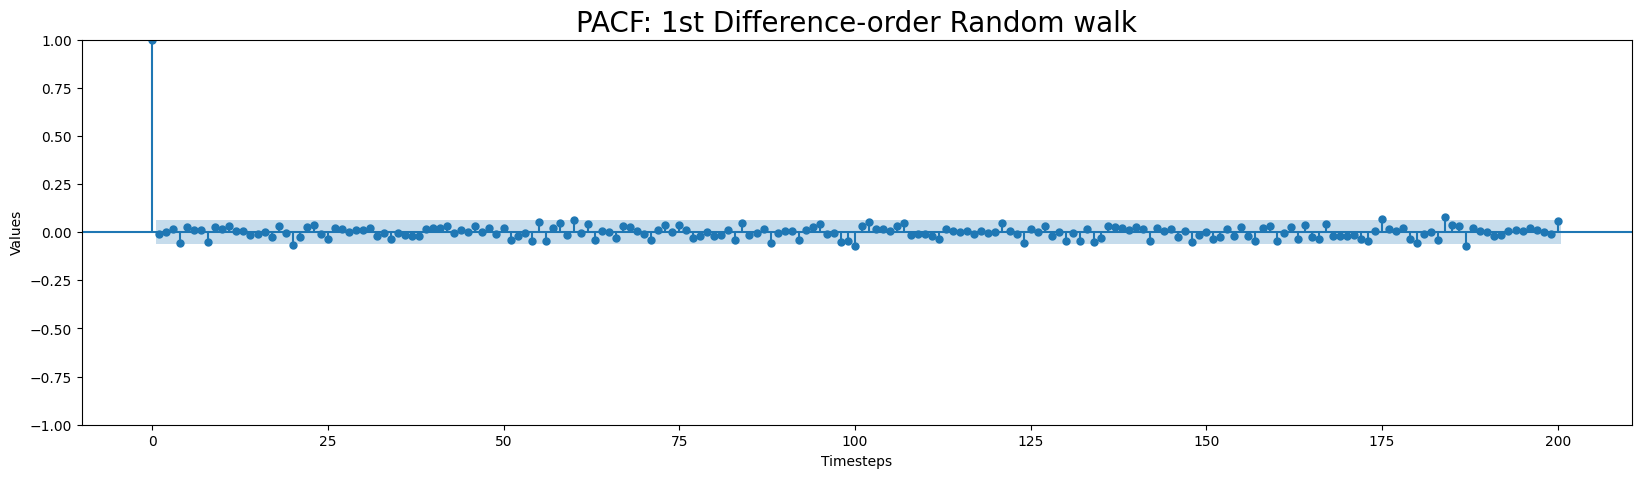

In [44]:
n_coef = 200
fig, ax = plt.subplots(figsize=(20,5))

# applying ACF
plot_pacf(diff_random_walk, ax=ax, lags=n_coef)
ax.set(xlabel='Timesteps', ylabel='Values', title = 'PACF: 1st Difference-order Random walk')
ax.title.set_size(20)
plt.show()

# 4. Conclusions

- White noise: time series process stationary and uncorrelated. It has mean zero and variance/volatility 1.
- Random Walk:  time series process non-stationary and one lag correlated. Its first difference is a $WN$ process.